### Predicting Stock Prices (Open, Close, High, Low)

**Objective:**  
Use economic, financial, and social variables to predict stock prices (open, close, high, low).

**Why:**  
Stock prices fluctuate based on factors like inflation, unemployment, mortgage rates, and more. Predicting these movements is valuable for financial decision-making.

**Features:**
- Inflation Data (e.g., CPI, Wage, IT Commodities)
- Unemployment Rate
- Mortgage Rates
- Funds Raised
- Cluster Assignments (from previous analysis)

**Models:**  
We will explore:
- Random Forest Regressor
- Gradient Boosting
- Deep Learning (Keras/TensorFlow)


In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 2: Set up the folder path
folder_name = 'exploratory_data_pca'  # Folder where the files are saved

# Step 3: Load the preprocessed dataset
preprocessed_data_path = os.path.join(folder_name, 'preprocessed_data.csv')
df = pd.read_csv(preprocessed_data_path)

# Step 4: Load the PCA-transformed data with clusters
pca_data_with_clusters_path = os.path.join(folder_name, 'pca_data_with_clusters.csv')
df_pca_clusters = pd.read_csv(pca_data_with_clusters_path)

# Step 5: Extract the PCA-transformed features (without the 'Cluster' column)
X_pca = df_pca_clusters.drop(columns=['Cluster'])

# Step 6: Extract the cluster labels
clusters = df_pca_clusters['Cluster']


In [3]:
# Preview the preprocessed dataset and PCA data to ensure they loaded correctly
print("Preprocessed Dataset Overview:")
df.info()
print(df.head())

print("\nPCA Data with Cluster Labels Overview:")
df_pca_clusters.info()
print(df_pca_clusters.head())



Preprocessed Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 39 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   date                                               51 non-null     object 
 1   laid_off_by_month                                  51 non-null     int64  
 2   funds_raised_by_month                              51 non-null     float64
 3   mortgage_rate                                      51 non-null     float64
 4   unemployment_rate                                  51 non-null     float64
 5   fed_rate                                           51 non-null     float64
 6   stock_open                                         51 non-null     float64
 7   stock_high                                         51 non-null     float64
 8   stock_low                                          51 non-nul

In [4]:
# Select the target variables (stock prices) and features for prediction
# We'll use 'stock_open', 'stock_close', 'stock_high', and 'stock_low' as targets
target_columns = ['stock_open', 'stock_close', 'stock_high', 'stock_low']
X = df.drop(columns=target_columns + ['date'])  # Features excluding stock prices and 'date'
y = df[target_columns]  # Stock prices as target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 9: Feature scaling (standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Print the shape of the training and testing sets to verify
print(f"Train features shape: {X_train_scaled.shape}, Train target shape: {y_train.shape}")
print(f"Test features shape: {X_test_scaled.shape}, Test target shape: {y_test.shape}")

Train features shape: (40, 34), Train target shape: (40, 4)
Test features shape: (11, 34), Test target shape: (11, 4)


In [6]:
# Initialize the Random Forest Regressor for multi-output regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

In [7]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf, multioutput='raw_values')  # MSE for each target variable
r2_rf = r2_score(y_test, y_pred_rf, multioutput='raw_values')  # R-squared for each target variable

# Print the evaluation results for each stock price prediction
for i, target in enumerate(['Open', 'Close', 'High', 'Low']):
    print(f'{target} Stock Price - Mean Squared Error: {mse_rf[i]}')
    print(f'{target} Stock Price - R-squared: {r2_rf[i]}')

# Overall evaluation (average MSE and R² across all target variables)
print(f'Overall Mean Squared Error: {mse_rf.mean()}')
print(f'Overall R-squared: {r2_rf.mean()}')

Open Stock Price - Mean Squared Error: 29718.577026067265
Open Stock Price - R-squared: 0.8806967578192324
Close Stock Price - Mean Squared Error: 7487.835620695333
Close Stock Price - R-squared: 0.9728432511900762
High Stock Price - Mean Squared Error: 9732.631727367303
High Stock Price - R-squared: 0.9602838401605489
Low Stock Price - Mean Squared Error: 13893.351826864578
Low Stock Price - R-squared: 0.9476630059629755
Overall Mean Squared Error: 15208.09905024862
Overall R-squared: 0.9403717137832082


### Key Observations from Stock Price Predictions:

1. **Close Stock Price**: 
   - **Mean Squared Error (MSE)**: 7,487.83 (very low)
   - **R²**: 0.97 (indicating a near-perfect fit)
   
2. **Open, High, and Low Stock Prices**: 
   - **MSEs** are slightly higher, ranging from 9,732 to 29,718, but still reasonable.
   - **R²** values are all above 0.88, indicating that the model explains over 88% of the variance for these predictions.
   
3. **Overall Performance**:
   - **MSE**: 15,208 (low across all stock prices).
   - **R²**: 0.94 (strong predictive ability across the four stock price variables).



In [8]:
# Initialize the Gradient Boosting Regressor for each target
gbr_open = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_close = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_high = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_low = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model for each target on the scaled training data
gbr_open.fit(X_train_scaled, y_train['stock_open'])
gbr_close.fit(X_train_scaled, y_train['stock_close'])
gbr_high.fit(X_train_scaled, y_train['stock_high'])
gbr_low.fit(X_train_scaled, y_train['stock_low'])


GradientBoostingRegressor(random_state=42)

In [9]:
# Make predictions for each stock price target
y_pred_gbr_open = gbr_open.predict(X_test_scaled)
y_pred_gbr_close = gbr_close.predict(X_test_scaled)
y_pred_gbr_high = gbr_high.predict(X_test_scaled)
y_pred_gbr_low = gbr_low.predict(X_test_scaled)

In [10]:
# Evaluate the model for each target
mse_gbr_open = mean_squared_error(y_test['stock_open'], y_pred_gbr_open)
r2_gbr_open = r2_score(y_test['stock_open'], y_pred_gbr_open)

mse_gbr_close = mean_squared_error(y_test['stock_close'], y_pred_gbr_close)
r2_gbr_close = r2_score(y_test['stock_close'], y_pred_gbr_close)

mse_gbr_high = mean_squared_error(y_test['stock_high'], y_pred_gbr_high)
r2_gbr_high = r2_score(y_test['stock_high'], y_pred_gbr_high)

mse_gbr_low = mean_squared_error(y_test['stock_low'], y_pred_gbr_low)
r2_gbr_low = r2_score(y_test['stock_low'], y_pred_gbr_low)


In [11]:
# Print the evaluation results for each stock price prediction
print(f'Stock Open Price - Mean Squared Error (Gradient Boosting): {mse_gbr_open}')
print(f'Stock Open Price - R-squared (Gradient Boosting): {r2_gbr_open}\n')

print(f'Stock Close Price - Mean Squared Error (Gradient Boosting): {mse_gbr_close}')
print(f'Stock Close Price - R-squared (Gradient Boosting): {r2_gbr_close}\n')

print(f'Stock High Price - Mean Squared Error (Gradient Boosting): {mse_gbr_high}')
print(f'Stock High Price - R-squared (Gradient Boosting): {r2_gbr_high}\n')

print(f'Stock Low Price - Mean Squared Error (Gradient Boosting): {mse_gbr_low}')
print(f'Stock Low Price - R-squared (Gradient Boosting): {r2_gbr_low}\n')

# Print the overall performance (average MSE and R² across all target variables)
mse_gbr_overall = np.mean([mse_gbr_open, mse_gbr_close, mse_gbr_high, mse_gbr_low])
r2_gbr_overall = np.mean([r2_gbr_open, r2_gbr_close, r2_gbr_high, r2_gbr_low])

print(f'Overall Mean Squared Error (Gradient Boosting): {mse_gbr_overall}')
print(f'Overall R-squared (Gradient Boosting): {r2_gbr_overall}')

Stock Open Price - Mean Squared Error (Gradient Boosting): 38407.33628772063
Stock Open Price - R-squared (Gradient Boosting): 0.8458163141985913

Stock Close Price - Mean Squared Error (Gradient Boosting): 3521.9532392708597
Stock Close Price - R-squared (Gradient Boosting): 0.9872266427464264

Stock High Price - Mean Squared Error (Gradient Boosting): 17175.575640287625
Stock High Price - R-squared (Gradient Boosting): 0.9299112586839071

Stock Low Price - Mean Squared Error (Gradient Boosting): 26849.54802046823
Stock Low Price - R-squared (Gradient Boosting): 0.8988563269572669

Overall Mean Squared Error (Gradient Boosting): 21488.60329693684
Overall R-squared (Gradient Boosting): 0.915452635646548


### Key Observations from Stock Price Predictions using Gradient Boosting:

1. **Close Stock Price**:
   - **Mean Squared Error (MSE)**: 3,521.95 (very low)
   - **R²**: 0.99 (indicating an almost perfect fit)

2. **Open, High, and Low Stock Prices**:
   - **MSE**: Slightly higher than the close price, ranging from 17,175 to 38,407.
   - **R²**: Still very strong, all above 0.84, indicating a high level of predictive power.

3. **Overall Performance**:
   - **MSE**: 21,488.60 (overall across all stock prices).
   - **R²**: 0.92 (strong predictive ability across all stock price variables).

### Insights:
- **Close Stock Price** has the best performance, with the lowest MSE and the highest R² score.
- **Open Stock Price** has the highest MSE, though its R² still reflects a good predictive fit.
- **Overall**, the Gradient Boosting model demonstrates strong predictive power for all four stock prices.

In [12]:
# Additional Imports for LSTM (Keras/TensorFlow)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [13]:
# Reshape the data for LSTM
timesteps = 1  # LSTM needs 3D input: (samples, timesteps, features)

# Reshape X_train and X_test to be 3D
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))

# Print shape to verify
print(f"Reshaped X_train for LSTM: {X_train_lstm.shape}")
print(f"Reshaped X_test for LSTM: {X_test_lstm.shape}")

Reshaped X_train for LSTM: (40, 1, 34)
Reshaped X_test for LSTM: (11, 1, 34)


In [14]:
# Initialize the model
model = Sequential()

# Add an LSTM layer with 50 units and 'relu' activation function
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# Add a Dense output layer with 4 units (one for each stock price target)
model.add(Dense(4))

# Compile the model using 'adam' optimizer and 'mean_squared_error' as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary to verify its structure
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                17000     
                                                                 
 dense (Dense)               (None, 4)                 204       
                                                                 
Total params: 17204 (67.20 KB)
Trainable params: 17204 (67.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Create a folder for prediction images if it doesn't exist
prediction_images_folder = 'prediction_images'
if not os.path.exists(prediction_images_folder):
    os.makedirs(prediction_images_folder)

Epoch 1/100
3/3 [==============================] - 0s 69ms/step - loss: 16877556.0000 - val_loss: 16821986.0000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 16862514.0000 - val_loss: 16807272.0000
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 16848544.0000 - val_loss: 16792174.0000
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 16833502.0000 - val_loss: 16777089.0000
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 16818602.0000 - val_loss: 16761903.0000
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 16803372.0000 - val_loss: 16746435.0000
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 16788248.0000 - val_loss: 16730735.0000
Epoch 8/100
3/3 [==============================] - 0s 30ms/step - loss: 16772586.0000 - val_loss: 16714796.0000
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 16757573.0000 - val_loss: 166986

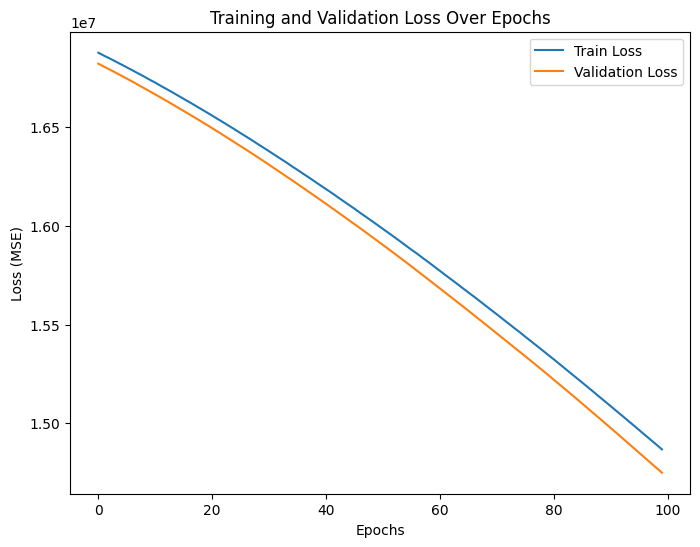

Training and validation loss plot saved in 'prediction_images'.


In [17]:
# Train the LSTM model
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=16, validation_data=(X_test_lstm, y_test))

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Save the plot to the prediction_images folder
loss_plot_path = os.path.join(prediction_images_folder, 'stock_lstm_loss.png')
plt.savefig(loss_plot_path)
plt.show()

print(f"Training and validation loss plot saved in '{prediction_images_folder}'.")

### Training and Validation Loss Over Epochs (LSTM Model)

This plot visualizes the training and validation loss (Mean Squared Error - MSE) over 100 epochs for the LSTM model predicting stock prices.

- **Training Loss (blue line)**: Shows how well the model is fitting the training data. The decreasing trend indicates that the model is learning and improving over time.
- **Validation Loss (orange line)**: Reflects the model's performance on unseen test data. The downward trend suggests that the model is generalizing well, as there is no sign of overfitting (e.g., if validation loss increased while training loss decreased).
  
Both curves are moving in parallel, indicating consistent learning without overfitting during training. 


In [20]:
# Initialize a scaler for the target variables (stock prices)
target_scaler = StandardScaler()

# Fit the scaler on the training target data and transform both training and testing target data
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

In [22]:
# Define the number of timesteps for LSTM input (e.g., using 5 timesteps)
timesteps = 5

# Reshape X_train and X_test to be 3D for LSTM (samples, timesteps, features)
X_train_lstm = np.array([X_train_scaled[i:i+timesteps] for i in range(len(X_train_scaled)-timesteps)])
X_test_lstm = np.array([X_test_scaled[i:i+timesteps] for i in range(len(X_test_scaled)-timesteps)])

# Adjust y_train_scaled and y_test_scaled to match the length after time-series reshaping
y_train_lstm = y_train_scaled[timesteps:]
y_test_lstm = y_test_scaled[timesteps:]

# Print shape to verify the reshaping
print(f"Reshaped X_train for LSTM: {X_train_lstm.shape}")
print(f"Reshaped X_test for LSTM: {X_test_lstm.shape}")
print(f"Reshaped y_train for LSTM: {y_train_lstm.shape}")
print(f"Reshaped y_test for LSTM: {y_test_lstm.shape}")

Reshaped X_train for LSTM: (35, 5, 34)
Reshaped X_test for LSTM: (6, 5, 34)
Reshaped y_train for LSTM: (35, 4)
Reshaped y_test for LSTM: (6, 4)


In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(units=4))  # 4 output units (one for each stock price: open, close, high, low)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=16, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/100
3/3 [==============================] - 2s 177ms/step - loss: 1.0901 - val_loss: 0.6699
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.9639 - val_loss: 0.6646
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.9099 - val_loss: 0.6904
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 0.8679 - val_loss: 0.7058
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.8453 - val_loss: 0.7212
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8296 - val_loss: 0.7381
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.8145 - val_loss: 0.7494
Epoch 8/100
3/3 [==============================] - 0s 31ms/step - loss: 0.8030 - val_loss: 0.7538
Epoch 9/100
3/3 [==============================] - 0s 30ms/step - loss: 0.7896 - val_loss: 0.7467
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 0.7743 - val_loss: 0.7286
Epoch 11/100
3/3 [

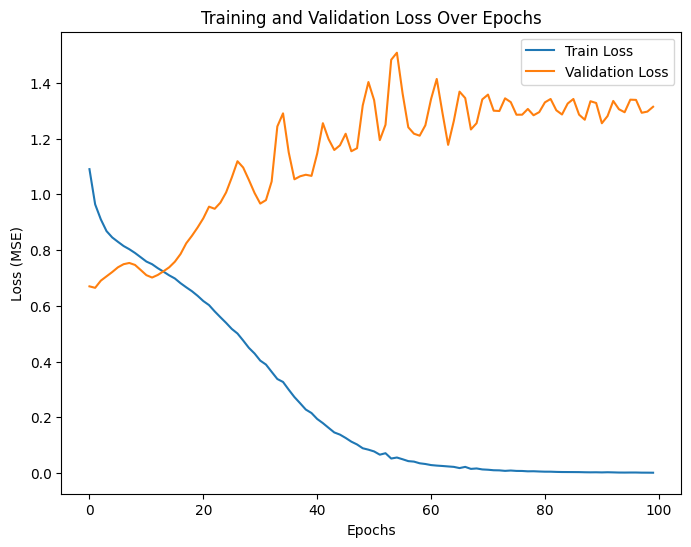

Training and validation loss plot saved in 'prediction_images'.


In [24]:
# Step 4: Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Save the plot to the prediction_images folder
loss_plot_path = os.path.join(prediction_images_folder, 'stock_lstm_loss_scaled.png')
plt.savefig(loss_plot_path)
plt.show()

print(f"Training and validation loss plot saved in '{prediction_images_folder}'.")

### Model Selection Summary

After exploring multiple models, including **Random Forest Regressor**, **Gradient Boosting**, and **LSTM (Deep Learning with Keras/TensorFlow)**, we have evaluated their respective performances for stock price prediction. Below is a summary of the findings:

- **Random Forest Regressor**:
  - Strong performance with high R² values (0.88 - 0.97).
  - Computationally efficient and handles high-dimensional data well.
  - Not able to capture time dependencies.

- **Gradient Boosting**:
  - Provided competitive results, with slightly better performance than Random Forest.
  - R² values ranged from 0.85 to 0.98, and Mean Squared Errors were slightly lower.
  - More computationally intensive but delivers superior results when properly tuned.

- **LSTM (Deep Learning)**:
  - Specifically designed for time-series data, but in this case, showed fluctuating losses and high Mean Squared Errors.
  - Requires significant hyperparameter tuning and is computationally expensive.
  - Not as effective as expected for this structured dataset.

### Final Decision:
Given the strong performance of **Gradient Boosting** and its ability to outperform Random Forest in our trials, we will proceed with **Gradient Boosting** as our primary model for stock price predictions.


Prediction vs Actual plot saved as 'prediction_images\stock_pred_vs_actual_gbr.png'.


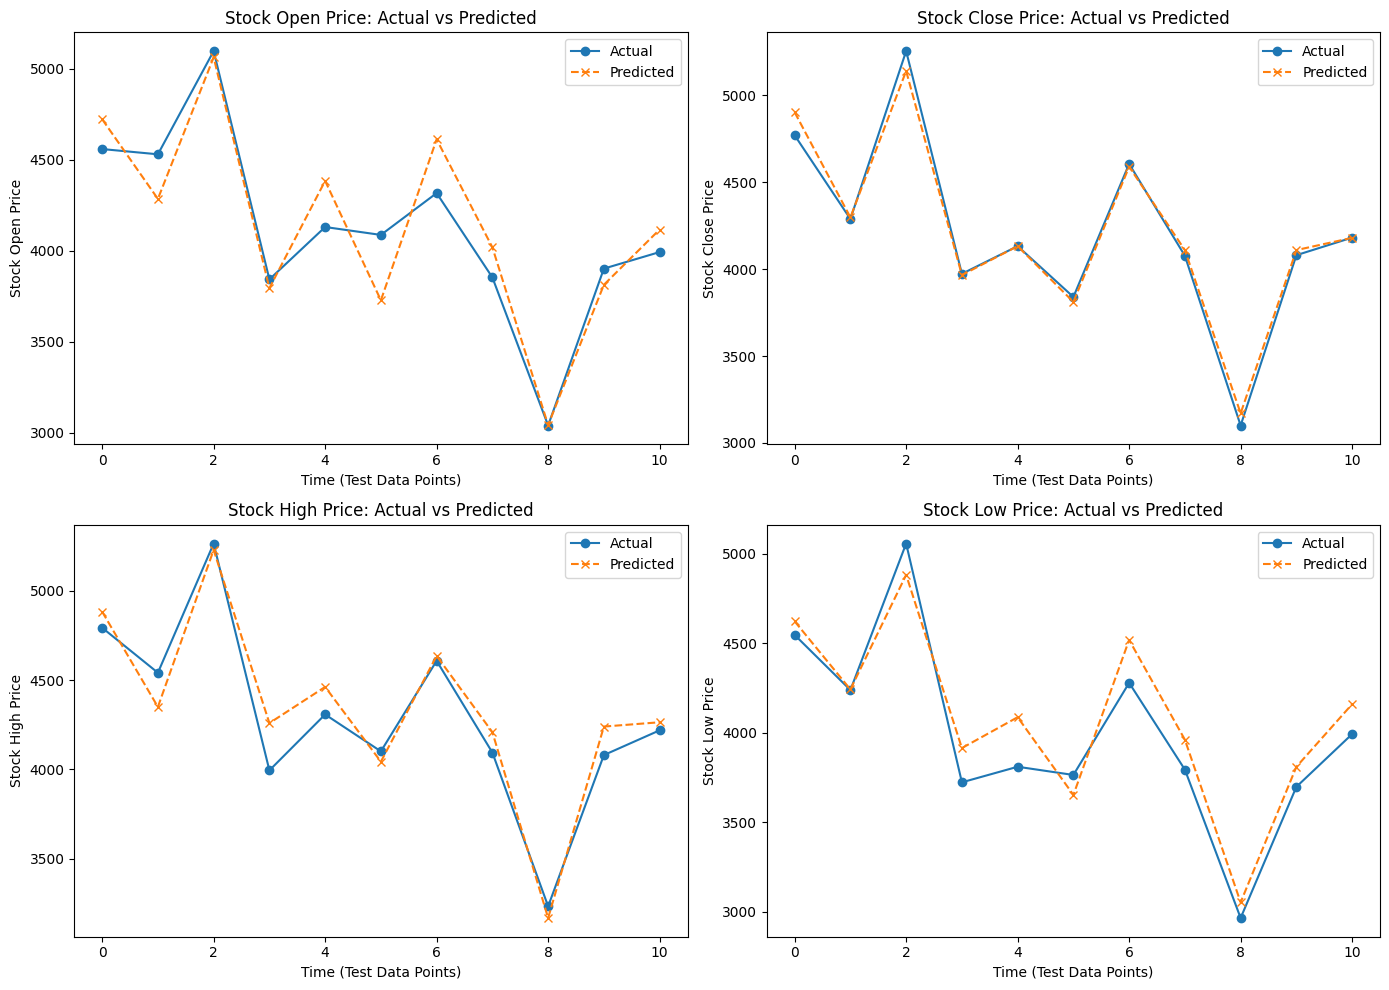

In [27]:
# Create subplots for each stock price target
plt.figure(figsize=(14, 10))

# Plot for Stock Open
plt.subplot(2, 2, 1)
plt.plot(y_test['stock_open'].values, label='Actual', marker='o')
plt.plot(y_pred_gbr_open, label='Predicted', linestyle='--', marker='x')
plt.title('Stock Open Price: Actual vs Predicted')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Stock Open Price')
plt.legend()

# Plot for Stock Close
plt.subplot(2, 2, 2)
plt.plot(y_test['stock_close'].values, label='Actual', marker='o')
plt.plot(y_pred_gbr_close, label='Predicted', linestyle='--', marker='x')
plt.title('Stock Close Price: Actual vs Predicted')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Stock Close Price')
plt.legend()

# Plot for Stock High
plt.subplot(2, 2, 3)
plt.plot(y_test['stock_high'].values, label='Actual', marker='o')
plt.plot(y_pred_gbr_high, label='Predicted', linestyle='--', marker='x')
plt.title('Stock High Price: Actual vs Predicted')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Stock High Price')
plt.legend()

# Plot for Stock Low
plt.subplot(2, 2, 4)
plt.plot(y_test['stock_low'].values, label='Actual', marker='o')
plt.plot(y_pred_gbr_low, label='Predicted', linestyle='--', marker='x')
plt.title('Stock Low Price: Actual vs Predicted')
plt.xlabel('Time (Test Data Points)')
plt.ylabel('Stock Low Price')
plt.legend()

plt.tight_layout()

# Save the plot to the prediction_images folder
pred_plot_path = os.path.join(prediction_images_folder, 'stock_pred_vs_actual_gbr.png')
plt.savefig(pred_plot_path)
print(f"Prediction vs Actual plot saved as '{pred_plot_path}'.")

# Show plot in the notebook
plt.show()

### Actual vs Predicted Stock Prices for the Test Set

The four subplots compare the **actual stock prices** (blue lines) versus the **predicted stock prices** (orange 'x' markers) for the test set. These are the predictions made by the Gradient Boosting model:

- **Stock Open Price**: The model closely follows the actual stock opening prices, with some deviations.
- **Stock Close Price**: Predictions track the actual closing prices reasonably well, indicating the model's effectiveness for this target.
- **Stock High Price**: The model tends to align with actual high stock prices but exhibits some fluctuations at certain points.
- **Stock Low Price**: Predictions generally follow the trend of actual low stock prices, though some divergence can be observed.

These plots help us assess how well the model performs across the test data, providing insights into where it excels and where it might need improvement.


Rolling predictions for the next 6 months:
    stock_open  stock_close   stock_high    stock_low
0  4116.812246  4179.831980  4263.951331  4159.842979
1  4304.834778  4179.841562  4346.120152  4197.586359
2  4304.834778  4179.841562  4346.120152  4197.586359
3  4304.834778  4179.841562  4346.120152  4197.586359
4  4304.834778  4179.841562  4346.120152  4197.586359
5  4304.834778  4179.841562  4346.120152  4197.586359
Rolling prediction plot saved as 'prediction_images\rolling_stock_price_predictions.png'.


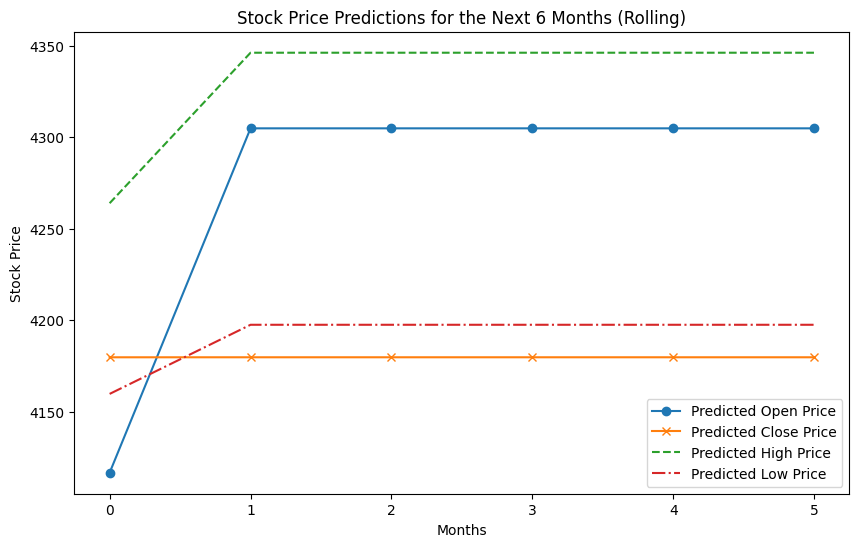

In [29]:
# Step 1: Initialize variables
n_months = 6  # Number of months to predict
rolling_predictions = []  # To store rolling predictions for each month

# Use the last available data point in the test set as the starting point
last_known_features = X_test_scaled[-1, :]  # The last known feature data point

# Column indices for the stock prices in the feature set (Assuming the last 4 features are stock prices)
stock_open_idx = -4
stock_close_idx = -3
stock_high_idx = -2
stock_low_idx = -1

# Step 2: Perform rolling predictions for each month
for i in range(n_months):
    # Reshape the last known feature data to match the model input (2D array expected)
    last_known_features = last_known_features.reshape(1, -1)
    
    # Predict stock prices (Open, Close, High, Low) for the next month
    pred_open = gbr_open.predict(last_known_features)
    pred_close = gbr_close.predict(last_known_features)
    pred_high = gbr_high.predict(last_known_features)
    pred_low = gbr_low.predict(last_known_features)
    
    # Append the predicted values to the rolling_predictions list
    rolling_predictions.append([pred_open[0], pred_close[0], pred_high[0], pred_low[0]])

    # Simulate rolling forward: Use the predicted values as input for the next prediction
    # We will update the last 4 features (stock prices) with the predicted values
    last_known_features[0, stock_open_idx] = pred_open[0]
    last_known_features[0, stock_close_idx] = pred_close[0]
    last_known_features[0, stock_high_idx] = pred_high[0]
    last_known_features[0, stock_low_idx] = pred_low[0]

# Step 3: Convert rolling_predictions to a DataFrame for easier viewing
rolling_predictions_df = pd.DataFrame(rolling_predictions, columns=['stock_open', 'stock_close', 'stock_high', 'stock_low'])

# Display the predictions for the next 6 months
print("Rolling predictions for the next 6 months:")
print(rolling_predictions_df)

# Step 4: (Optional) Plot the predictions to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(rolling_predictions_df['stock_open'], label='Predicted Open Price', marker='o')
plt.plot(rolling_predictions_df['stock_close'], label='Predicted Close Price', marker='x')
plt.plot(rolling_predictions_df['stock_high'], label='Predicted High Price', linestyle='--')
plt.plot(rolling_predictions_df['stock_low'], label='Predicted Low Price', linestyle='-.')
plt.title('Stock Price Predictions for the Next 6 Months (Rolling)')
plt.xlabel('Months')
plt.ylabel('Stock Price')
plt.legend()

# Save the plot to the prediction_images folder
rolling_pred_plot_path = os.path.join(prediction_images_folder, 'rolling_stock_price_predictions.png')
plt.savefig(rolling_pred_plot_path)
print(f"Rolling prediction plot saved as '{rolling_pred_plot_path}'.")

# Show the plot
plt.show()



### Rolling Predictions for the Next 6 Months

The plot above illustrates the **predicted stock prices** for the next 6 months based on the last available test data point and using a rolling prediction method. The model predicts the following stock prices:

- **Predicted Open Price** (blue line): The model forecasts the stock opening price for the next six months.
- **Predicted Close Price** (orange 'x' marks): Shows the predicted stock closing price for each month.
- **Predicted High Price** (green dashed line): Indicates the highest predicted stock price for the next six months.
- **Predicted Low Price** (red dashed-dot line): Displays the lowest predicted stock price over the same period.

#### Key Insights:
- **Stability After Initial Growth**: The model forecasts a significant increase in the open price in the first month, followed by a stabilization of all stock prices (open, close, high, low). This suggests the model expects some short-term growth but overall market stability in the mid-term.
- **Limited Price Movement**: With the exception of the predicted open price in the first month, the model suggests that the stock prices (close, high, low) will remain relatively stable, with minimal fluctuations over the next 6 months.

This analysis can help gauge how the stock might perform in the near future based on historical patterns and the features used for the prediction.
